# Import the libraries

In [1]:
%pip install openpyxl
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset

In [3]:
df = pd.read_excel('ur3_dataset.xlsx')

In [4]:
df.head()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,Robot_ProtectiveStop,grip_lost,System_Health
0,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,0,0,0
1,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,0,0,0
2,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,0,0,0
3,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,0,0,0
4,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,0,0,0


# Check for missing values

In [5]:
df.isnull().sum()

Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
Robot_ProtectiveStop    0
grip_lost               0
System_Health           0
dtype: int64

In [6]:
df.dtypes

Current_J0              float64
Temperature_T0          float64
Current_J1              float64
Temperature_J1          float64
Current_J2              float64
Temperature_J2          float64
Current_J3              float64
Temperature_J3          float64
Current_J4              float64
Temperature_J4          float64
Current_J5              float64
Temperature_J5          float64
Speed_J0                float64
Speed_J1                float64
Speed_J2                float64
Speed_J3                float64
Speed_J4                float64
Speed_J5                float64
Tool_current            float64
Robot_ProtectiveStop      int64
grip_lost                 int64
System_Health             int64
dtype: object

# Split the data

In [7]:
# Print the number of columns
len(df.columns)
# Predict values
X = df.drop(['Robot_ProtectiveStop', 'grip_lost', 'System_Health'], axis=1)
print(f'X shape before resample: ', X.shape)
# Target values
y = df['System_Health']
print(f'y shape before resample: ', y.shape)

X shape before resample:  (7409, 19)
y shape before resample:  (7409,)


# Handling imbalanced class

In [8]:
df['System_Health'].value_counts()

System_Health
0    6837
1     572
Name: count, dtype: int64

In [9]:
# categorical_features = ['System_Health']
# df = pd.get_dummies(df, columns=categorical_features)

In [10]:
categorical_features = [18]
# smotenc = SMOTENC(random_state=42, categorical_features=categorical_features, k_neighbors=1)
smotenc = SMOTENC(random_state=42, categorical_features=categorical_features)
X_resampled, y_resampled = smotenc.fit_resample(X, y)
print(f'X shape after resample: ', X_resampled.shape)
print(f'y shape after resample: ', y_resampled.shape)

X shape after resample:  (13674, 19)
y shape after resample:  (13674,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.3, random_state=42)

In [12]:
# Check for duplicates
X_resampled.duplicated().sum()

np.int64(641)

In [13]:
y_resampled.value_counts()

System_Health
0    6837
1    6837
Name: count, dtype: int64

In [14]:
# Check split dataset dimensions
print(f'X_train: {X_resampled.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_resampled.shape}')
print(f'y_test: {y_test.shape}')

X_train: (13674, 19)
X_test: (4103, 19)
y_train: (13674,)
y_test: (4103,)


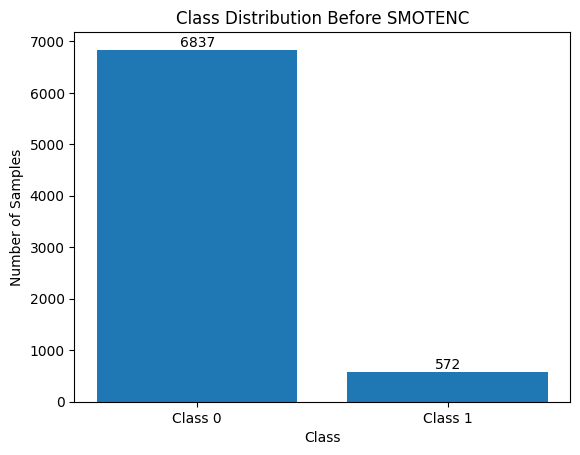

In [15]:
# Plot bargraph before applying SMOTENC
import matplotlib.pyplot as plt
from collections import Counter
# Plot class distribution after balancing
counts = Counter(y)
plt.bar(["Class 0", "Class 1"], counts.values())

#plt.bar(["Class 0", "Class 1"], Counter(y_resampled).values())
for i, value in enumerate(counts.values()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.title("Class Distribution Before SMOTENC")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

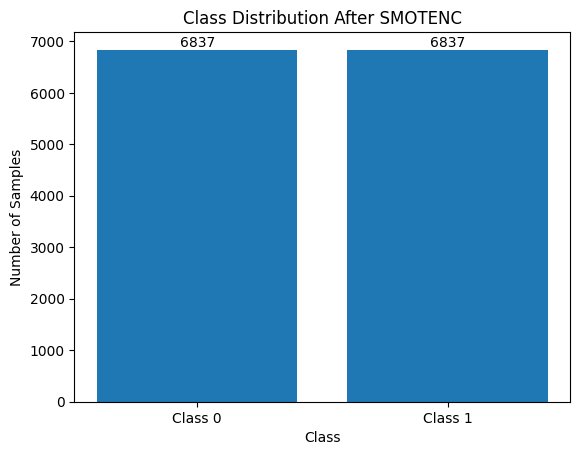

In [16]:
# Plot bargraph after applying SMOTENC
import matplotlib.pyplot as plt
from collections import Counter
# Plot class distribution after balancing
counts = Counter(y_resampled)
plt.bar(["Class 0", "Class 1"], counts.values())

#plt.bar(["Class 0", "Class 1"], Counter(y_resampled).values())
for i, value in enumerate(counts.values()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.title("Class Distribution After SMOTENC")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# Build a Random Forest Model

In [17]:
import numpy as np
# Calculate class weights (inversely proportional to class frequencies)
class_weights = {0: 1, 1: np.mean(y) / (1 - np.mean(y))}  # Example: Assuming class 0 is 0 and class 1 is 1
rf_model = RandomForestClassifier(n_estimators=200, #200
                                  random_state=42,
                                  max_features='sqrt',
                                  max_depth=20, #10
                                  min_samples_leaf=50,
                                  class_weight='balanced'
                                  ) 

In [18]:
# Grid Search
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 15, 20], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf' : [5, 10, 15, 20]}
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
# grid_search.fit(X_train_resampled, y_train_resampled)
# best_params = grid_search.best_params_
# print("Best parameters:", best_params) 

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define StratifiedKFold
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# To store results
fold_accuracies = []

# Stratified K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    # Use .iloc for pandas DataFrame/Series
    if hasattr(X_train, "iloc"):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    else:  # Use array-style indexing if X_train is a numpy array
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the current fold
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val_fold)
    
    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Print overall performance
print(f"\nMean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Standard Deviation: {np.std(fold_accuracies):.4f}")


Fold 1 Accuracy: 0.8935
Fold 2 Accuracy: 0.8960
Fold 3 Accuracy: 0.9091
Fold 4 Accuracy: 0.8929
Fold 5 Accuracy: 0.9007

Mean Accuracy: 0.8984
Standard Deviation: 0.0060


In [20]:
# Make predictions on the original test set
y_pred = rf_model.predict(X_test)

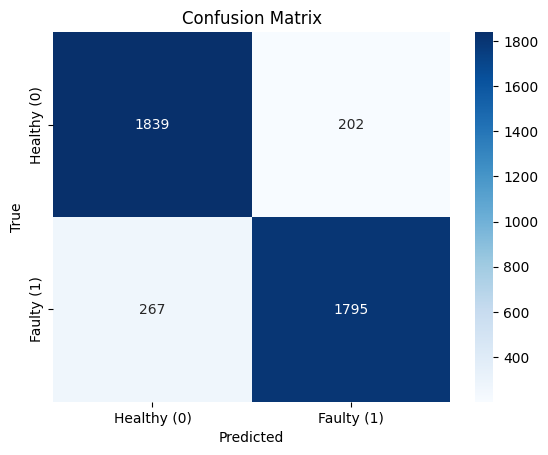

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy (0)", "Faulty (1)"], yticklabels=["Healthy (0)", "Faulty (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import numpy as np
# Use StratifiedKFold to evaluate the model performance
# Define StratifiedKFold with 5 splits
# Define StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics (including a custom function for Kappa)
def kappa_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    kappa = cohen_kappa_score(y, y_pred)
    return kappa

scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1_macro': 'f1_macro', 'precision_macro': 'precision_macro', 
           'recall_macro': 'recall_macro', 'kappa': kappa_scorer} 

# Perform cross-validation
results = cross_validate(rf_model, X_train, y_train, scoring=scoring, cv=skf)

# Calculate mean and standard deviation for each metric
mean_accuracy = np.mean(results['test_accuracy'])
std_accuracy = np.std(results['test_accuracy'])

mean_auc = np.mean(results['test_roc_auc'])
std_auc = np.std(results['test_roc_auc'])

mean_f1 = np.mean(results['test_f1_macro'])
std_f1 = np.std(results['test_f1_macro'])

mean_precision = np.mean(results['test_precision_macro'])
std_precision = np.std(results['test_precision_macro'])

mean_recall = np.mean(results['test_recall_macro'])
std_recall = np.std(results['test_recall_macro'])

mean_kappa = np.mean(results['test_kappa'])
std_kappa = np.std(results['test_kappa'])

# Print results
print(f'Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'AUC: {mean_auc:.4f} ± {std_auc:.4f}')
print(f'F1-Score: {mean_f1:.4f} ± {std_f1:.4f}')
print(f'Precision: {mean_precision:.4f} ± {std_precision:.4f}')
print(f'Recall: {mean_recall:.4f} ± {std_recall:.4f}')
print(f'Kappa: {mean_kappa:.4f} ± {std_kappa:.4f}')

Accuracy: 0.9024 ± 0.0077
AUC: 0.9653 ± 0.0044
F1-Score: 0.9024 ± 0.0077
Precision: 0.9029 ± 0.0076
Recall: 0.9024 ± 0.0077
Kappa: 0.8048 ± 0.0154


In [23]:
from sklearn.metrics import classification_report


# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2041
           1       0.90      0.87      0.88      2062

    accuracy                           0.89      4103
   macro avg       0.89      0.89      0.89      4103
weighted avg       0.89      0.89      0.89      4103



In [24]:
y_test.value_counts()

System_Health
1    2062
0    2041
Name: count, dtype: int64

[0.03018359 0.01949184 0.04558102 0.0214691  0.0637906  0.01784113
 0.17691029 0.02008909 0.02767267 0.02155603 0.13171141 0.03076591
 0.048991   0.03402261 0.03386536 0.07513591 0.04879247 0.08484565
 0.06728431]


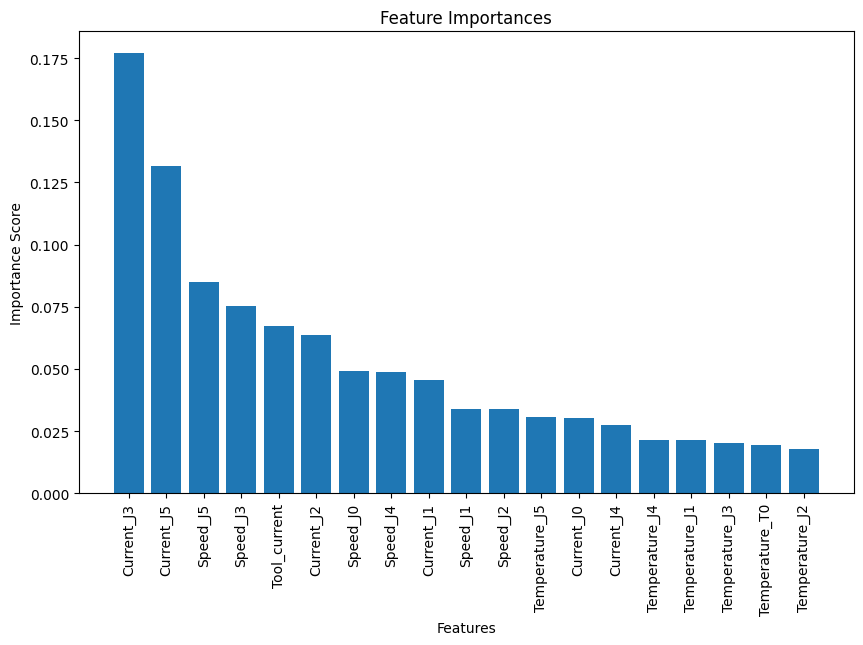

In [25]:
import matplotlib.pyplot as plt
#Get feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
print(feature_importances)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

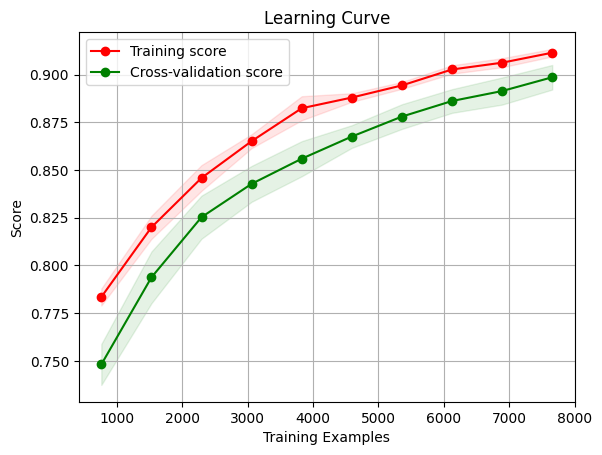

In [26]:
from sklearn.model_selection import StratifiedKFold, learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Define a custom scorer to handle single-label folds
# Define a custom scorer
def custom_balanced_accuracy(y_test, y_pred):
    return balanced_accuracy_score(y_test, y_pred)

# Create a StratifiedKFold object 
# Define StratifiedKFold to ensure balanced splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(custom_balanced_accuracy)


# Define the training set sizes to use for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10 data points for the learning curve
    cv=cv,  # Use 5-fold cross-validation
    scoring=scorer  # Choose your desired scoring metric
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

plt.show()

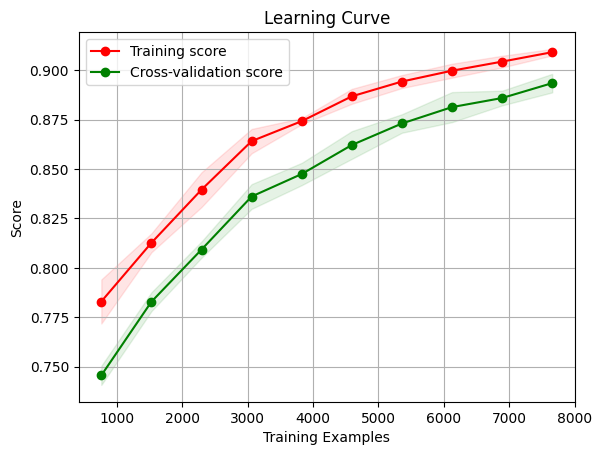

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer, f1_score

def custom_f1_score(y_test, y_pred):
  if np.sum(y_test) == 0 or np.sum(y_pred) == 0:
    return 0  # Or any other defined value for zero division
  else:
    return f1_score(y_test, y_pred)

scorer = make_scorer(custom_f1_score)

# Define the training set sizes to use for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10 data points for the learning curve
    cv=5,  # Use 5-fold cross-validation
    scoring=scorer # Choose your desired scoring metric
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

plt.show()